In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 05 15:26:35 2018

@author: Alska001
"""

import gurobipy as gp
import matplotlib.pyplot as plt
import numpy as np

D = 2 #number of days
T = D*24 # number of 1 hr intervals
t=np.linspace(1, T, num=T) 



#### np.linspace: Return evenly spaced numbers over a specified interval

#### np.random.seed
random.seed(self, seed=None)
Reseed a legacy MT19937 BitGenerator

#### Notes
This is a convenience, legacy function.
The best practice is to not reseed a BitGenerator, rather to recreate a new one. This method is here for legacy reasons. 

#### Some Variables for the model:


In [5]:
np.random.seed(1)
randomv = np.random.randn(T) 
d = 8 + 4*np.sin(2*np.pi*t/24) + 0.05*t + 1.5*randomv
# d for demand

#Return a sample (or samples) from the “standard normal” distribution
randomv

array([ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763,
       -2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038,
        1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944,
       -1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521,
       -1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595,
       -0.68372786, -0.12289023, -0.93576943, -0.26788808,  0.53035547,
       -0.69166075, -0.39675353, -0.6871727 , -0.84520564, -0.67124613,
       -0.0126646 , -1.11731035,  0.2344157 ,  1.65980218,  0.74204416,
       -0.19183555, -0.88762896, -0.74715829,  1.6924546 ,  0.05080775,
       -0.63699565,  0.19091548,  2.10025514])

In [6]:
d #demand at each timestep

array([11.52179423,  9.18236538, 10.1861695 , 10.05464868, 13.41181475,
        8.84769195, 14.83092095, 10.72229126, 11.75698577, 10.12594444,
       11.77843809,  5.50978894,  7.13109801,  6.12391847,  7.62222704,
        3.68606148,  4.72765438,  3.58321237,  5.14961731,  6.41012121,
        4.57064411,  8.81708556,  9.4671099 ,  9.95374151, 11.6365601 ,
       10.27440821, 11.99409179, 11.46044746, 12.91187119, 14.2955332 ,
       12.37621218, 12.46897132, 11.44766807, 10.43219154,  9.77840698,
        9.7810031 ,  7.1387583 ,  8.25162355,  9.61127614,  7.64896463,
        5.89854337,  4.76855655,  5.16555925,  9.27458029,  7.49778451,
        7.34450653,  9.60109705, 13.5503827 ])

In [7]:
N = 4 # number of generators

Pmax=[4, 5, 9, 2] #max power output for each generator
Pmin=[1, 1, 1, 0]  
alpha= [1, 1.2, 1.5, 1] #function for determing cost of running each generator

### Gurobi Model:
p is the power output for generator 'N' at time 'T'




In [8]:
m=gp.Model() #initialise the model

p = m.addVars(N,T,name='p') 

p

Restricted license - for non-production use only - expires 2022-01-13


{(0, 0): <gurobi.Var *Awaiting Model Update*>,
 (0, 1): <gurobi.Var *Awaiting Model Update*>,
 (0, 2): <gurobi.Var *Awaiting Model Update*>,
 (0, 3): <gurobi.Var *Awaiting Model Update*>,
 (0, 4): <gurobi.Var *Awaiting Model Update*>,
 (0, 5): <gurobi.Var *Awaiting Model Update*>,
 (0, 6): <gurobi.Var *Awaiting Model Update*>,
 (0, 7): <gurobi.Var *Awaiting Model Update*>,
 (0, 8): <gurobi.Var *Awaiting Model Update*>,
 (0, 9): <gurobi.Var *Awaiting Model Update*>,
 (0, 10): <gurobi.Var *Awaiting Model Update*>,
 (0, 11): <gurobi.Var *Awaiting Model Update*>,
 (0, 12): <gurobi.Var *Awaiting Model Update*>,
 (0, 13): <gurobi.Var *Awaiting Model Update*>,
 (0, 14): <gurobi.Var *Awaiting Model Update*>,
 (0, 15): <gurobi.Var *Awaiting Model Update*>,
 (0, 16): <gurobi.Var *Awaiting Model Update*>,
 (0, 17): <gurobi.Var *Awaiting Model Update*>,
 (0, 18): <gurobi.Var *Awaiting Model Update*>,
 (0, 19): <gurobi.Var *Awaiting Model Update*>,
 (0, 20): <gurobi.Var *Awaiting Model Update*>,
 (

### Add Contraints:

1. The total generated power p(which has associated N,T) must never exceed pmax for all t in range 1 to T and all generators n in range N

2. Same for min

3. The sum of the power output for each genarator much be greater or equal to the demand at each timestamp

In [29]:
m.addConstrs(p[n,t] <= Pmax[n] for t in range(T) for n in range(N))
m.addConstrs(p[n,t] >= Pmin[n] for t in range(T) for n in range(N))
m.addConstrs(gp.quicksum(p[n,t] for n in range(N)) >= d[t] for t in range(T))

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

### Problem Formulation

obj = The cost (alpha_generator * power output of each generator at each timestep) 

aim: minimise the cost

In [33]:
obj = gp.quicksum(alpha[n]*p[n,t] for n in range(N) for t in range(T))

m.setObjective(obj, gp.GRB.MINIMIZE)
m.optimize()

P=m.getAttr("X")

P=np.reshape(P, (N,T))
p_gen = np.asmatrix(P)

Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 432 rows, 192 columns and 576 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+01]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.1152796e+02   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  5.115279649e+02


In [34]:
print("p_gen:", p_gen)

p_gen: [[4.         4.         4.         4.         4.         4.
  4.         4.         4.         4.         4.         4.
  3.61679632 1.         1.         1.         1.3076236  3.83411836
  1.         1.5218847  3.89314734 2.22021409 2.25944375 4.
  4.         4.         4.         4.         4.         4.
  4.         4.         4.         4.         4.         4.
  3.76412606 3.59490833 3.48557704 2.83864365 3.17782713 4.
  2.10559984 2.88621728 3.64809569 3.30136822 4.         4.        ]
 [4.94226424 4.76658505 4.96700182 2.2229441  5.         5.
  5.         5.         3.67710984 4.73600843 1.74181803 4.53231711
  1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.         1.         3.51375839
  4.22031945 3.64756498 5.         5.         5.         5.
  5.         5.         3.64881053 5.         2.96661493 2.50174321
  1.         1.         1.         1.         1.         1.78823731
  1.         1.         1.         1.       

### Plotting the Results

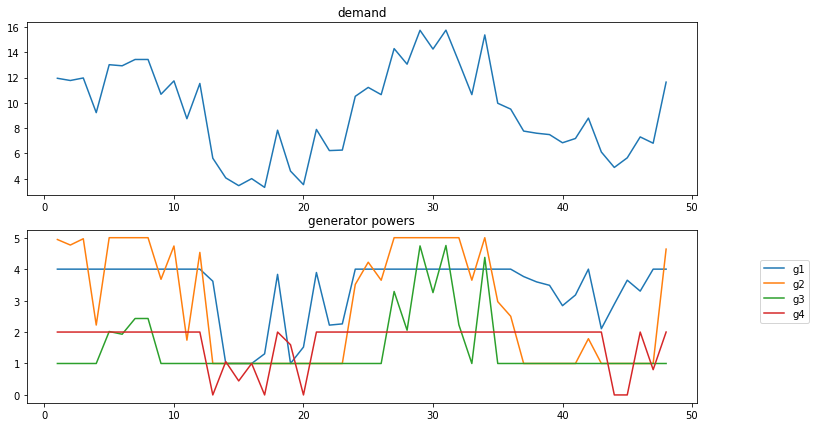

In [38]:
plt.figure(1, figsize = (12,7))
plt.subplot(2,1,1)
plt.plot(t, d)
plt.title('demand')
plt.subplot(2,1,2)
plt.plot(t, p_gen.T)
plt.title('generator powers')
plt.legend(['g1', 'g2', 'g3', 'g4'],bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=3)


TypeError: only size-1 arrays can be converted to Python scalars